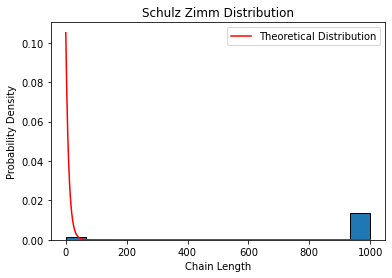

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete
from scipy.stats import rv_continuous
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import pandas as pd
from scipy.optimize import brentq
import math
class Flory_Schulz(rv_continuous):
    def _pdf(self, x, p):
        self.x = x
        self.p = p
        #self.Mn = Mn
        return p**(x-1)*(p-1)**2
        #return (z**(z+1)/np.math.gamma(z+1))*(x**(z-1)/Mn**(z))*np.exp(-z*x/Mn)
        #return ((z**(z+1)/np.math.gamma(z+1))*(x**(z)/Mn**(z+1))*np.exp(-z*x/Mn))

# Parameters for the distribution
np.random.seed(100)
p = 0.9 #1.0  # Shape parameter
#x = np.arange(2, 15,1)
num_samples = 630
#b = 350
# Create an instance of the Schulz - Zimm distribution to generate random samples from the distribution
FS = Flory_Schulz(a = 0, b = 1000, name='SZ') # The convergence of the root-finding algorithm can be sensitive to the choice of parameters.
monomers_per_polymer = FS.rvs(p=p,  size=num_samples)
#monomers_per_polymer = brentq(SZ.ppf, 0, 1000, args=(random.random(), z, Mn), maxiter=1000)
# Create a histogram to visualize the distribution
plt.hist(monomers_per_polymer, bins=15, edgecolor = "black", density=True)
# Calculate the theoretical distribution for visualization
x_vals3 = np.linspace(0, max(monomers_per_polymer), num_samples)
y_vals3 = FS.pdf(x_vals3, p=p)
#plt.plot(x_vals, y_vals / np.trapz(y_vals, x_vals), color='red', label='Theoretical Distribution')
plt.plot(x_vals3, y_vals3 / np.trapz(y_vals3, x_vals3), color='red', label='Theoretical Distribution')
#plt.ylim([0, 0.07])
plt.xlabel('Chain Length')
plt.ylabel('Probability Density')
plt.title('Schulz Zimm Distribution')
plt.legend()
plt.show()

In [17]:
import numpy as np
from scipy.stats import rv_continuous
import matplotlib.pyplot as plt

class CustomDistribution(rv_continuous):
    def _pdf(self, x, p):
        return p**(x - 1) * (p - 1)**2

def generate_custom_distribution(p_values, size=1000):
    custom_dist = CustomDistribution(a=1, b=np.inf, shapes="p")
    samples = custom_dist.rvs(p_values[:, np.newaxis], size=size)
    return samples

# Values of p to plot
p_values = np.linspace(1.1, 3.0, 100)

# Generate and plot the custom distribution for all p values
samples = generate_custom_distribution(p_values, size=1000)

plt.hist(samples.T, bins=50, density=True, alpha=0.5, label=[f'p={p:.2f}' for p in p_values])
plt.title('Custom Distribution for Different p Values')
plt.xlabel('Value of x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

ValueError: size does not match the broadcast shape of the parameters. 1000, (1, 1000), (100, 1)

Number of the polymer chains 630
56442
Average molecular weight is  98.59154530314305
number average molecular weight is  89.5904761904762
Dispersity is  1.1004690397395578


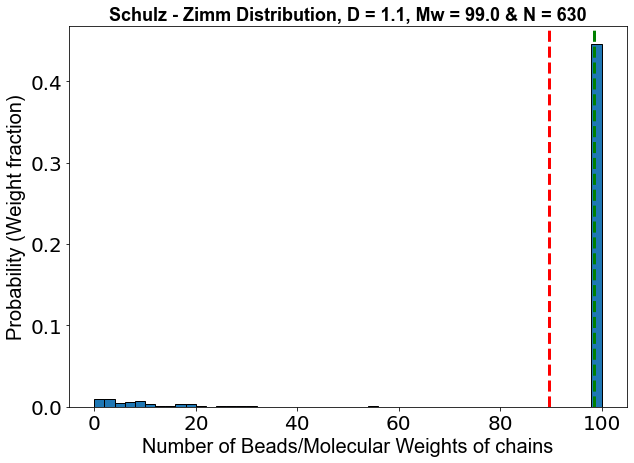

In [12]:
#monomers_per_polymer = [math.ceil(x) for x in monomers_per_polymer]
monomers_per_polymer = monomers_per_polymer.astype(int)
list_mon = list(monomers_per_polymer)

print("Number of the polymer chains", len(list_mon))
print(sum(monomers_per_polymer))
"""Calculating the dispersity"""
z = Counter(list_mon)
data = pd.DataFrame({"No_chains":z})
data.index
data.reset_index(inplace = True)
data = data.rename(columns = {'index': "No_of_monomers"})
data['weight_fraction'] = data["No_of_monomers"]*data["No_chains"]/sum(data["No_of_monomers"]* data["No_chains"])  
Mw = sum((data['No_of_monomers']*data['weight_fraction']))
print("Average molecular weight is ", Mw)
Mn = sum((data['No_of_monomers']*data['No_chains']))/sum(data['No_chains'])
print("number average molecular weight is ", Mn)
D = Mw/Mn
print("Dispersity is ", D)
a = np.array(list_mon)
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = 50, edgecolor = "black", density = True)
ax.axvline(a.mean(), color='r', linestyle='dashed', linewidth=3)
ax.axvline(Mw, color='g', linestyle='dashed', linewidth=3)
#plt.title('SZ (MW = , D = 41.4)', fontsize = 30, fontweight = 'bold', fontname="Arial")

plt.title(f'Schulz - Zimm Distribution, D = {round(D, 2)}, Mw = {round(Mw,0)} & N = {num_samples}', fontsize = 18, fontweight = 'bold', fontname="Arial")
plt.xlabel("Number of Beads/Molecular Weights of chains", fontsize = 20, fontname="Arial")
plt.ylabel("Probability (Weight fraction)", fontsize = 20, fontname="Arial")
#plt.legend(loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.ylim([0, 0.0175])
#plt.xlim([0,1200])
plt.show()

In [42]:
max(monomers_per_polymer)

610

Text(0, 0.5, 'Probability Density')

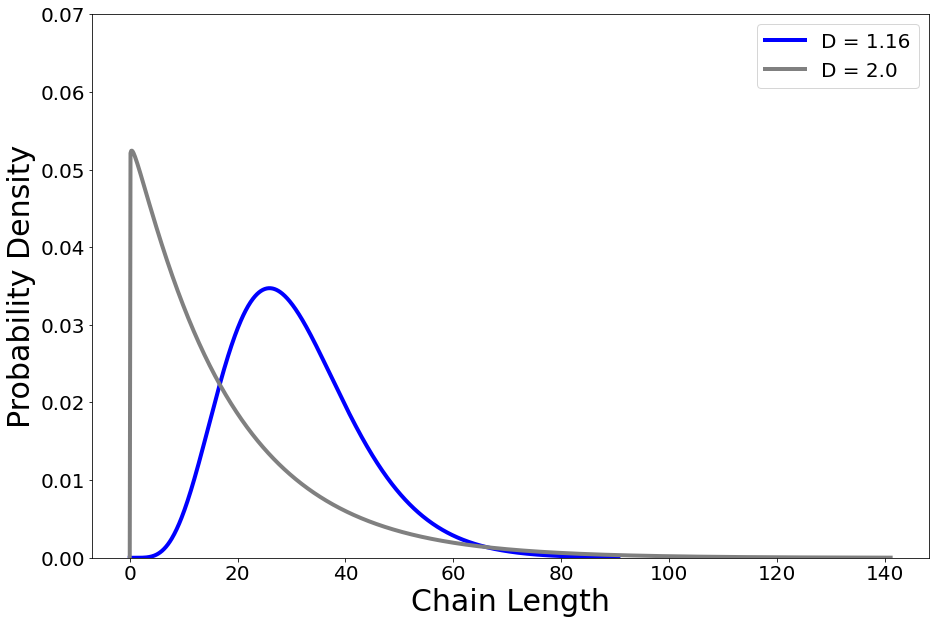

In [103]:
plt.figure(figsize=(15,10))
#plt.plot(x_vals, y_vals / np.trapz(y_vals, x_vals), color='green', label='D = 1.04', linewidth = 4)
plt.plot(x_vals1, y_vals1 / np.trapz(y_vals1, x_vals1), color='blue', label='D = 1.16', linewidth = 4)
#plt.plot(x_vals2, y_vals2 / np.trapz(y_vals2 , x_vals2), color='black', label='D = 1.4', linewidth = 4)
#plt.plot(x_vals3, y_vals3 / np.trapz(y_vals3 , x_vals3), color='red', label='D = 1.6', linewidth = 4)
#plt.plot(x_vals4, y_vals4 / np.trapz(y_vals4 , x_vals4), color='purple', label='D = 1.8', linewidth = 4)
plt.plot(x_vals5, y_vals5 / np.trapz(y_vals5 , x_vals5), color='grey', label='D = 2.0', linewidth = 4)
plt.legend(fontsize = 20)
plt.ylim([0, 0.07])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Chain Length', fontsize=30)
plt.ylabel('Probability Density', fontsize=30)

In [82]:
help(timeit)

Help on module timeit:

NAME
    timeit - Tool for measuring execution time of small code snippets.

MODULE REFERENCE
    https://docs.python.org/3.9/library/timeit
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module avoids a number of common traps for measuring execution
    times.  See also Tim Peters' introduction to the Algorithms chapter in
    the Python Cookbook, published by O'Reilly.
    
    Library usage: see the Timer class.
    
    Command line usage:
        python timeit.py [-n N] [-r N] [-s S] [-p] [-h] [--] [statement]
    
    Options:
      -n/--number N: how many times to execute 'statement' (default: see below)
      -r/--repeat N: how many times to repeat the timer (